### Quantum randomizer with 4 qubits.

#### The problem:

Use superposition to generate equal amplitudes for each output state which will then result in equal probabilities creating a theoretically random result.

### Circuit design:

In order to create a superposition in all 4 qubits each qubit needs to have a Hadamard gate to create a 50/50 probability of a |1> or |0> state in all qubits. Then each qubit can be measured onto 4 classical bits. 

In [6]:
# IBM Quantum Lab boilerplate code.

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# result = Sampler("ibmq_qasm_simulator").run(circuits).result()

In [7]:
# Create Quantum circuit
circuit = QuantumCircuit(4, 4)

# Add Hadamard gates
circuit.h(0)
circuit.h(1)
circuit.h(2)
circuit.h(3)

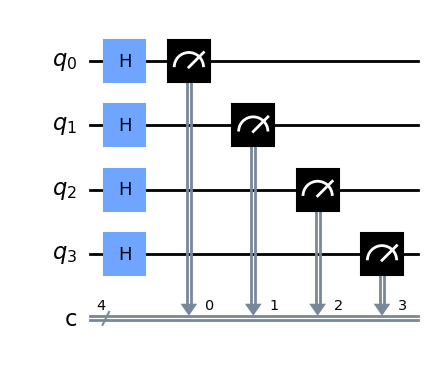

In [8]:
# Measure qubits
circuit.measure(range(4), range(4))

# Draw circuit
circuit.draw('mpl')

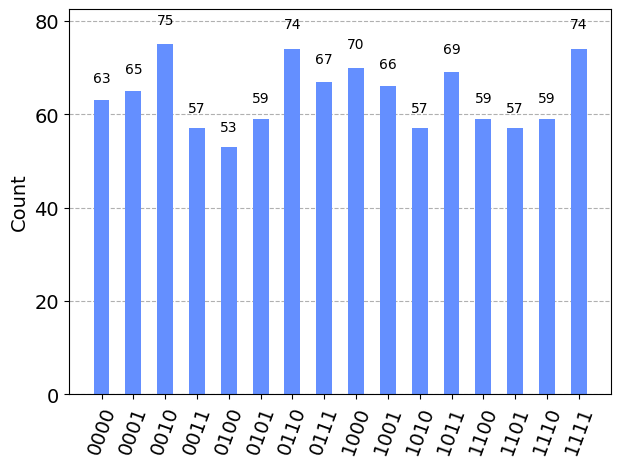

In [9]:
# Execute circuit on Aer simulator
simulator = Aer.get_backend('qasm_simulator')

# Excecute job
job = execute(circuit, simulator, shots=1024)

# Get results
results = job.result()
counts = results.get_counts(circuit)

# Plot histogram of results
plot_histogram(counts)